In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


C:\Users\Saikat\AppData\Local\Temp\ipykernel_4372\256808149.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Text(0.5, 1.0, 'Data Points')

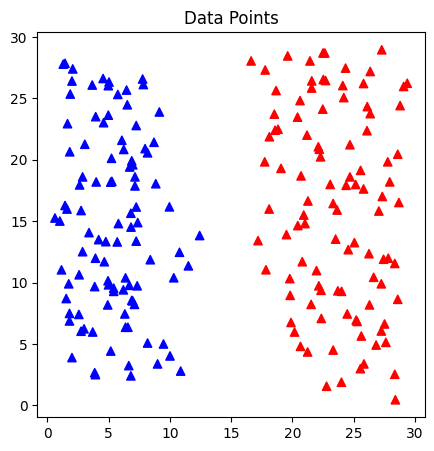

In [13]:

class Perceptron:
    def __init__(self, learning_rate=0.1, epoch=1000):
        self.learning_rate = learning_rate
        self.max_iterations = epoch

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)
        X = np.insert(X, 0, 1, axis=1)  # Add bias term
        for _ in range(self.max_iterations):
            for i, x in enumerate(X):
                if np.dot(x, self.weights) * y[i] <= 0:
                    self.weights += self.learning_rate * y[i] * x

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)  # Add bias term
        return np.sign(np.dot(X, self.weights))


# Load data
data = pd.read_csv('annotated_points_np_200.csv')
X = data[['x', 'y']].values
y = np.where(data['labels'] == 1, 1, -1)



# Plot results
plt.figure(figsize=(5, 5))

# Plot data points

plt.scatter(X[:, 0], X[:, 1],  c=['blue' if label == 1 else 'red' for label in y],marker="^" ) 
plt.title('Data Points')



Text(0.5, 1.0, 'Random Initialization')

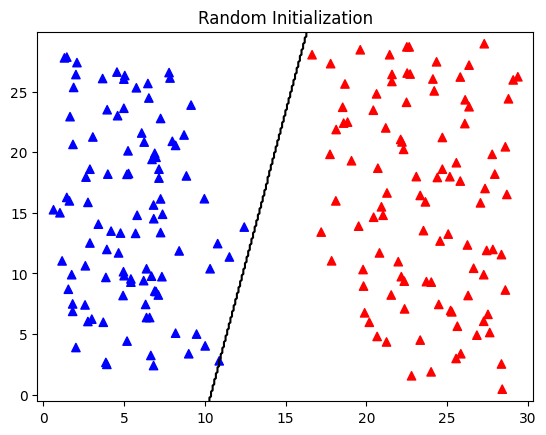

In [20]:
# Initializing Perceptron
perceptron_random = Perceptron()

# Fit Perceptron
perceptron_random.fit(X, y)

# Plot decision boundaries

plt.scatter(X[:, 0], X[:, 1],  c=['blue' if label == 1 else 'red' for label in y],marker="^")
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = perceptron_random.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contour(xx1, xx2, Z, levels=[0], colors='k')
plt.title('Random Initialization')



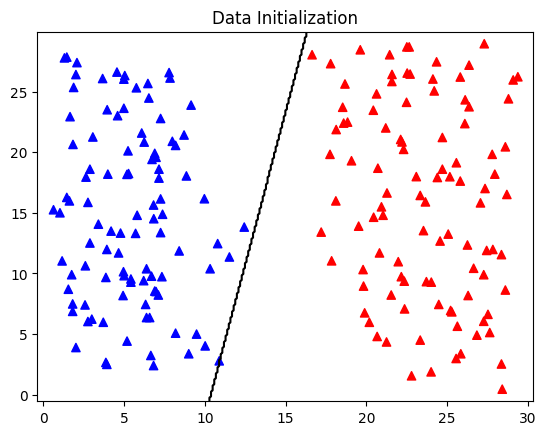

In [19]:
# Initializing Perceptron

perceptron_data_init = Perceptron()
# Fit Perceptron
perceptron_data_init.fit(X, y)


plt.scatter(X[:, 0], X[:, 1],  c=['blue' if label == 1 else 'red' for label in y],marker="^")
Z = perceptron_data_init.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contour(xx1, xx2, Z, levels=[0], colors='k')
plt.title('Data Initialization')

plt.show()


Text(0.5, 1.0, 'Zeros Initialization')

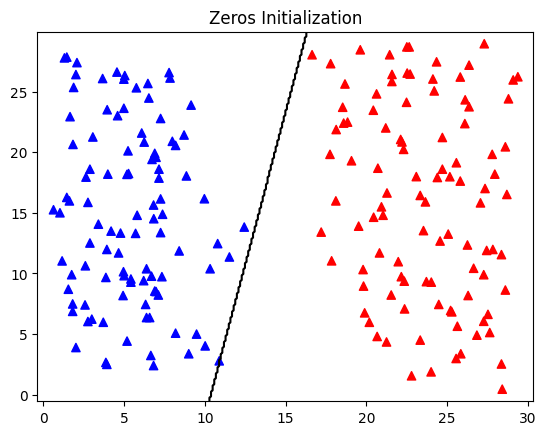

In [18]:
# Initializing Perceptron

perceptron_zeros_init = Perceptron()
# Fit Perceptron
perceptron_zeros_init.fit(X, y)

plt.scatter(X[:, 0], X[:, 1],  c=['blue' if label == 1 else 'red' for label in y],marker="^")
Z = perceptron_zeros_init.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contour(xx1, xx2, Z, levels=[0], colors='k')
plt.title('Zeros Initialization')
